In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# **本项目为1980-2020 近40年间全球电子游戏销售分析**

数据集来源于Kaggle https://www.kaggle.com/gregorut/videogamesales

以下主要针对三个问题进行分析:
* 玩家最喜欢的游戏类型是？这种趋势最近是否发生了变化？
* 玩家最喜欢的游戏平台是什么？这种趋势最近是否发生了变化？
* 40年来游戏市场是如何发展的？不同发行商的游戏销售量是如何变化的？

kaggle的notebook并不自带pyecharts

需在console 手动pip install pyecharts

In [ ]:
import numpy as np
import pandas as pd
import  matplotlib.pyplot as plt
import seaborn as sns
import datetime
from pyecharts import charts
from pyecharts import options as opts
%matplotlib inline

**一、读取数据**

In [ ]:
df = pd.read_csv('/kaggle/input/videogamesales/vgsales.csv', header=0)
df.head(10)

In [ ]:
df.info()

In [ ]:
df.describe().T

40年间，平均销售量北美第一、欧洲其次，日本最少，结合实际分析推测外国游戏可能在日本并不受到欢迎

In [ ]:
df.describe(include='object').T

该份数据统计了12种游戏类型，31个平台，578家发行商的数据

**二、预处理**

数据集共包含16589条记录

In [ ]:
df.shape[0]

In [ ]:
df[df['Publisher'].isnull()].shape[0]

In [ ]:
df.dropna(how='any', inplace=True)
df.info()

有58条记录中，发行商字段存在空缺，考虑到占比很小，可以直接drop

In [ ]:
df.describe().T

In [ ]:
df.describe(include='object').T

**三、数据分析**

FGG 最受玩家欢迎的游戏类型

In [ ]:
FGG = pd.pivot_table(df, index='Year', columns='Genre', values='Global_Sales', aggfunc=np.sum).sum().sort_values(ascending=False)
FGG

FGG_5 近5年最受玩家欢迎的游戏类型

In [ ]:
FGG_5 = pd.pivot_table(df, index='Year', columns='Genre', values='Global_Sales', aggfunc=np.sum).iloc[-5:,:].sum().sort_values(ascending=False)
FGG_5

In [ ]:
FGG = pd.pivot_table(df, index='Year', columns='Genre', values='Global_Sales', aggfunc=np.sum).sum().sort_values(ascending=False)
FGG = pd.DataFrame(data=FGG, columns=['Genre_Sales'])
FGG_5 = pd.pivot_table(df, index='Year', columns='Genre', values='Global_Sales', aggfunc=np.sum).iloc[-5:,:].sum().sort_values(ascending=False)
FGG_5 = pd.DataFrame(data=FGG_5,columns=['Genre_Sales'])

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12,6))
sns.barplot(x=FGG.index,y='Genre_Sales',data=FGG,ax=ax1)
sns.barplot(x=FGG_5.index,y='Genre_Sales',data=FGG_5,ax=ax2)

近5年最受玩家欢迎的游戏依旧为动作、运动、射击，知识运动与射击的地位发生了交换

FGP 最受玩家欢迎的游戏平台

FGP_5 近5年最受玩家欢迎的游戏平台

In [ ]:
FGP = pd.pivot_table(df, index='Year', columns='Platform', values='Global_Sales', aggfunc=np.sum).sum().sort_values(ascending=False)
FGP = pd.DataFrame(data=FGP,columns=['Global_Sales'])
FGP_5 = pd.pivot_table(df, index='Year', columns='Platform',values='Global_Sales',aggfunc=np.sum).iloc[-5:,:].sum().sort_values(ascending=False)
FGP_5 = pd.DataFrame(data=FGP_5, columns=['Global_Sales'])

In [ ]:
fig, (ax1,ax2) = plt.subplots(2, 1, figsize=(12,6))
sns.barplot(x=FGP.index, y='Global_Sales', data=FGP, ax=ax1)
sns.barplot(x=FGP_5.index, y='Global_Sales', data=FGP_5, ax=ax2)

PS 最受玩家欢迎的游戏发行商

PS_5 近5年最受玩家欢迎的游戏发行商

In [ ]:
PS = pd.pivot_table(data=df,index='Publisher', values='Global_Sales', aggfunc=np.sum).sort_values(by='Global_Sales',ascending=False)
df_5 = df[df['Year'] > 2015]
PS_5 = pd.pivot_table(data=df_5,index='Publisher', values='Global_Sales', aggfunc=np.sum).sort_values(by='Global_Sales',ascending=False)

In [ ]:
demo = [list(z) for z in zip(PS.head(5).index, PS.head(5).values)]
list(demo)

list(PS.head(5).values[:, 0].astype('int'))
[list(z) for z in zip(PS.head(5).index, list(PS.head(5).values[:,0].astype('int')))]

In [ ]:
pie = charts.Pie(opts.InitOpts(width="1800px", height="800px"))
pie.add(series_name="40年间", data_pair=[list(z) for z in zip(PS.head(5).index, list(PS.head(5).values[:,0]))], 
        center=["30%", "50%"], radius="40%")
pie.add(series_name="近5年间", data_pair=[list(z) for z in zip(PS_5.head(5).index, list(PS_5.head(5).values[:,0]))], 
        center=["78%", "50%"], radius="40%")
pie.set_series_opts(label_opts=opts.LabelOpts(is_show=True, font_size=18, font_weight='bold', formatter='{b}:{d}%'))
pie.set_global_opts(title_opts=opts.TitleOpts(title="发行商对比图", title_textstyle_opts=opts.TextStyleOpts(font_size=30, font_weight='bold'), pos_left='center'), legend_opts=opts.LegendOpts(is_show=False))

pie.render('前5名的发行商变化.html')

左侧为40年间前5名发行商的份额占比，右图为近5年来前5名发行商的总份额占比

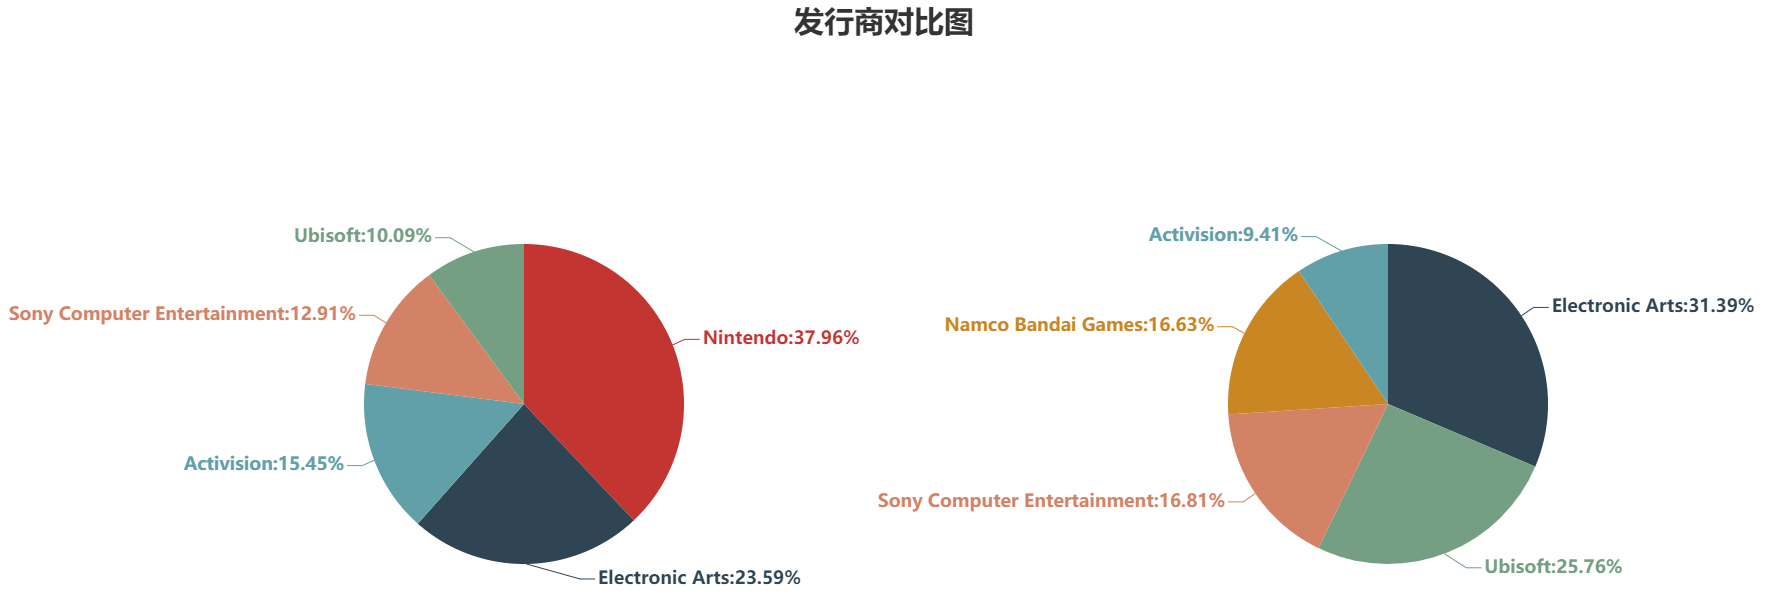

40年间不同地区的销售量是如何变化？

In [ ]:
districts = ['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']
Market = pd.pivot_table(df, index='Year', values=districts, aggfunc=np.sum)

In [ ]:
fig=plt.figure(figsize=(10,6))
sns.lineplot(data=Market)
plt.title('The development of all markets')
plt.show()

In [ ]:
Plateform = ['Nintendo','Electronic Arts','Activision','Sony Computer Entertainment','Ubisoft']

In [ ]:
PHS = df[df['Publisher'].isin(Plateform)]
PHS = pd.pivot_table(data=PHS, index='Year', columns='Publisher', values='Global_Sales', aggfunc=np.sum)
PHS.plot(title='Global Sales with year',figsize=(12,6))

In [ ]:
PHS = df[df['Publisher'].isin(Plateform)]
Plateform_G = pd.pivot_table(data=PHS, index=['Genre','Publisher'], values=Market, aggfunc=np.sum).sort_values(by=['Genre','Global_Sales'],ascending=False) #这里必须对Genre排序不然会乱，只能对Genre分组
Plateform_G.head()

In [ ]:
Plateform_G_PCT = Plateform_G.div(Plateform_G.groupby(level=0).sum()).round(2)
Plateform_G_PCT=Plateform_G_PCT.sort_values(by=['Genre','Global_Sales'],ascending=False)
Plateform_G_PCT

# ----------------------------------------------------------------------------------------------------------------------------

# Below are some analysis for Ubisoft.

以下为针对Ubisoft的分析。

In [ ]:
df_Ubisoft = df[df['Publisher']=='Ubisoft']
df_Ubisoft.sort_values(by='Year')
df_Ubisoft.isnull().sum()

**Year特征中有部分缺失值，直接drop**

In [ ]:
df_Ubisoft.dropna(axis=0,how='any', inplace=True)
df_Ubisoft.isnull().sum()
df_Ubisoft

先来看看土豆这40年来，每年都发行多少游戏。

In [ ]:
df_Ubisoft.sort_values(by='Year', inplace=True)
df_Ubisoft

In [ ]:
len(df_Ubisoft['Name'].unique())

数据集中包含了总计571款不同的游戏

In [ ]:
Ubisoft_G_N = pd.pivot_table(data=df_Ubisoft, index='Year', values='Name', aggfunc='count')
Ubisoft_G_N = pd.DataFrame(data=Ubisoft_G_N.values, index=Ubisoft_G_N.index, columns=['Count'])
Ubisoft_G_N

In [ ]:
sns.lineplot(x=Ubisoft_G_N.index, y='Count', data=Ubisoft_G_N)

2008年左右发行数量迎来的顶峰，之后逐渐回落

再来看看不同类型的游戏数量的差异。

In [ ]:
Ubisoft_G = df_Ubisoft.groupby('Genre')['Name'].agg('count')
Ubisoft_G = pd.DataFrame(data=Ubisoft_G.values, index=Ubisoft_G.index, columns=['Count'])
Ubisoft_G.sort_values(by='Count', ascending=False, inplace=True)

In [ ]:
fig = plt.figure(figsize=(15, 5))
sns.barplot(x=Ubisoft_G.index, y='Count', data=Ubisoft_G)

可以看到Action、Misc、Simulation为发行量上的前三类

最后看看几十年间在世界各地的销量情况

全球范围销量

In [ ]:
Ubisoft_GLSales_genre = pd.pivot_table(data=df_Ubisoft, index='Genre', values='Global_Sales', aggfunc=np.sum)
Ubisoft_GLSales_genre = pd.DataFrame(data=Ubisoft_GLSales_genre.values, index=Ubisoft_GLSales_genre.index, columns=['Global Sales'])
Ubisoft_GLSales_genre.sort_values(by='Global Sales', ascending=False, inplace=True)

Ubisoft_GLSales_year = pd.pivot_table(data=df_Ubisoft, index='Year', values='Global_Sales', aggfunc=np.sum)
Ubisoft_GLSales_year = pd.DataFrame(data=Ubisoft_GLSales_year.values, index=Ubisoft_GLSales_year.index, columns=['Global Sales'])
Ubisoft_GLSales_year.sort_values(by='Year', ascending=True, inplace=True)

In [ ]:
Ubisoft_GLSales_genre

In [ ]:
Ubisoft_GLSales_year

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(15, 10))
sns.barplot(x=Ubisoft_GLSales_genre.index, y='Global Sales', data=Ubisoft_GLSales_genre, ax=axes[0])
sns.lineplot(x=Ubisoft_GLSales_year.index, y='Global Sales', data=Ubisoft_GLSales_year, ax=axes[1])

北美销量

In [ ]:
Ubisoft_NASales_genre = pd.pivot_table(data=df_Ubisoft, index='Genre', values='NA_Sales', aggfunc=np.sum)
Ubisoft_NASales_genre = pd.DataFrame(data=Ubisoft_NASales_genre.values, index=Ubisoft_NASales_genre.index, columns=['NA Sales'])
Ubisoft_NASales_genre.sort_values(by='NA Sales', ascending=False, inplace=True)

Ubisoft_NASales_year = pd.pivot_table(data=df_Ubisoft, index='Year', values='NA_Sales', aggfunc=np.sum)
Ubisoft_NASales_year = pd.DataFrame(data=Ubisoft_NASales_year.values, index=Ubisoft_NASales_year.index, columns=['NA Sales'])
Ubisoft_NASales_year.sort_values(by='Year', ascending=True, inplace=True)

In [ ]:
Ubisoft_NASales_genre

In [ ]:
Ubisoft_NASales_year

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(15, 10))
sns.barplot(x=Ubisoft_NASales_genre.index, y='NA Sales', data=Ubisoft_NASales_genre, ax=axes[0])
sns.lineplot(x=Ubisoft_NASales_year.index, y='NA Sales', data=Ubisoft_NASales_year, ax=axes[1])

欧洲销量

In [ ]:
Ubisoft_EUSales_genre = pd.pivot_table(data=df_Ubisoft, index='Genre', values='EU_Sales', aggfunc=np.sum)
Ubisoft_EUSales_genre = pd.DataFrame(data=Ubisoft_EUSales_genre.values, index=Ubisoft_EUSales_genre.index, columns=['EU Sales'])
Ubisoft_EUSales_genre.sort_values(by='EU Sales', ascending=False, inplace=True)

Ubisoft_EUSales_year = pd.pivot_table(data=df_Ubisoft, index='Year', values='EU_Sales', aggfunc=np.sum)
Ubisoft_EUSales_year = pd.DataFrame(data=Ubisoft_EUSales_year.values, index=Ubisoft_EUSales_year.index, columns=['EU Sales'])
Ubisoft_EUSales_year.sort_values(by='Year', ascending=True, inplace=True)

In [ ]:
Ubisoft_EUSales_genre

In [ ]:
Ubisoft_EUSales_year

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(15, 10))
sns.barplot(x=Ubisoft_EUSales_genre.index, y='EU Sales', data=Ubisoft_EUSales_genre, ax=axes[0])
sns.lineplot(x=Ubisoft_EUSales_year.index, y='EU Sales', data=Ubisoft_EUSales_year, ax=axes[1])

日本销量

In [ ]:
Ubisoft_JPSales_genre = pd.pivot_table(data=df_Ubisoft, index='Genre', values='JP_Sales', aggfunc=np.sum)
Ubisoft_JPSales_genre = pd.DataFrame(data=Ubisoft_JPSales_genre.values, index=Ubisoft_JPSales_genre.index, columns=['JP Sales'])
Ubisoft_JPSales_genre.sort_values(by='JP Sales', ascending=False, inplace=True)

Ubisoft_JPSales_year = pd.pivot_table(data=df_Ubisoft, index='Year', values='JP_Sales', aggfunc=np.sum)
Ubisoft_JPSales_year = pd.DataFrame(data=Ubisoft_JPSales_year.values, index=Ubisoft_JPSales_year.index, columns=['JP Sales'])
Ubisoft_JPSales_year.sort_values(by='Year', ascending=True, inplace=True)

In [ ]:
Ubisoft_JPSales_genre

In [ ]:
Ubisoft_JPSales_year

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(15, 10))
sns.barplot(x=Ubisoft_JPSales_genre.index, y='JP Sales', data=Ubisoft_JPSales_genre, ax=axes[0])
sns.lineplot(x=Ubisoft_JPSales_year.index, y='JP Sales', data=Ubisoft_JPSales_year, ax=axes[1])

总对比图

In [ ]:
Sales_Contrast = pd.concat([Ubisoft_GLSales_year, Ubisoft_NASales_year, Ubisoft_EUSales_year, Ubisoft_JPSales_year], axis=1)
Sales_Contrast

In [ ]:
fig = plt.figure(figsize=(15, 5))
sns.lineplot(data=Sales_Contrast,markers=True, dashes=False)